# Problem Statement

To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.

#  importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading The dataset

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing the data

# Data Inspection

In [3]:
df.shape

(8124, 23)

we found that we have 8123 rows and 23 columns which are corectly printed

In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# finding categorical and numerical varibles
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])

Categorical Features in DataSet: 23
Numerical Features in DataSet: 0


# Data Cleaning

Since we dont have missing values and no numerical varibles we can skip to next step

# Outlier detection and handling 

In [7]:
for column in df.columns:
    print(column,df[column].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


veil-type has only 1 value so we can drop that column.since we have categorical datset There is no library available which can detect an outlier within categorical data.

In [8]:
df.drop(['veil-type'],axis=1,inplace=True)

# Label encoding

In [9]:
# Labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns
for i in var_mod:
    df[i] = le.fit_transform(df[i])

<AxesSubplot:>

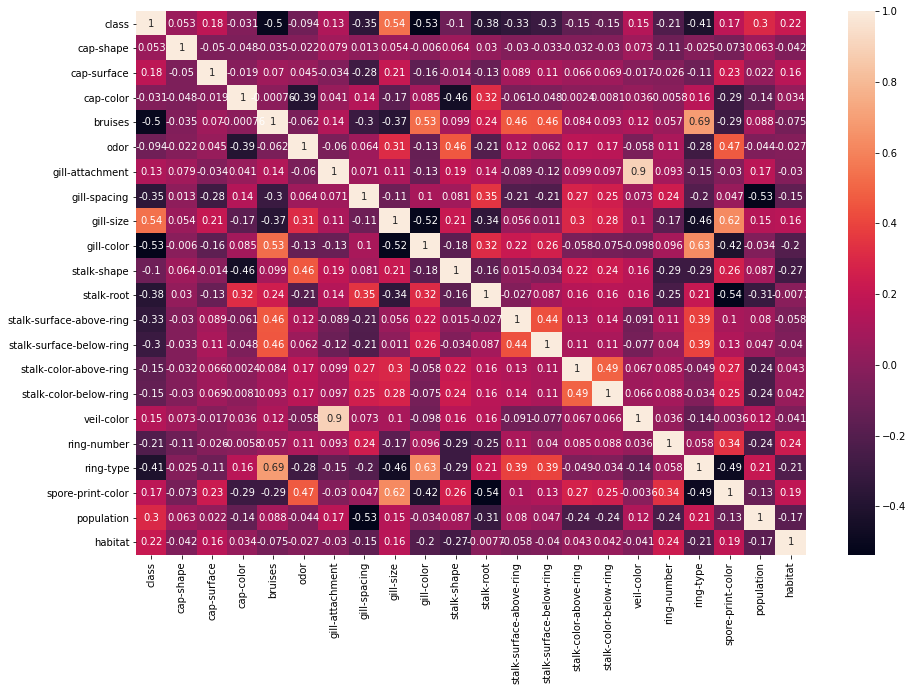

In [10]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [11]:
#gill-attachment and veil-color have high correlation so we drop veil color
df.drop(['veil-color'],axis=1,inplace=True)

# Exploratory Data Analysis

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,3,2,2,7,7,1,0,3,0,1


In [13]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

these are the features and class is the target feature

In [14]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

# DataVisualization

<AxesSubplot:xlabel='class', ylabel='count'>

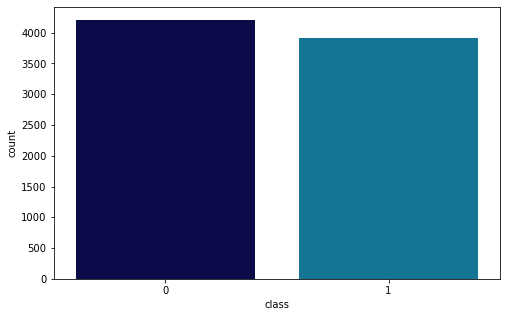

In [15]:
plt.figure(figsize=(8,5))
sns.countplot('class',data=df,palette='ocean')

We have visualised that more edible than poisnous mushroom

# Modelling

# Split Dataset into Training set and Test set 

In [16]:
X=df.drop(['class'],axis=1)
y=df[['class']]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))
print('F1score:',f1_score(y_test,pred))
print(classification_report(y_test, pred))

accuracy_score: 1.0
confusion_matrix:
 [[843   0]
 [  0 782]]
F1score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [22]:
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))
print('F1score:',f1_score(y_test,pred))
print(classification_report(y_test, pred))

accuracy_score: 1.0
confusion_matrix:
 [[843   0]
 [  0 782]]
F1score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Naïve Bayes’ Classifier

# GaussianNB

In [23]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_pred=GNB.predict(X_test)

In [24]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9236923076923077


# BernoulliNB

In [25]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(X_train,y_train)
y_pred=BNB.predict(X_test)

In [26]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.8418461538461538


accuracy has reduced

# MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train,y_train)
y_pred=MNB.predict(X_test)

In [28]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.803076923076923


# ComplementNB

In [29]:
from sklearn.naive_bayes import ComplementNB
CNB=ComplementNB()
CNB.fit(X_train,y_train)
y_pred=CNB.predict(X_test)

In [30]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.8024615384615384


# Standarisation

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [44]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [45]:
GNB.fit(X_train,y_train)
y_pred=GNB.predict(X_test)

In [46]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9243076923076923


# Fine Tuning

In [47]:
print(GNB.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [71]:
NGNB=GaussianNB(priors= None, var_smoothing=  1e-1000000000000)
NGNB.fit(X_train,y_train)
y_pred=NGNB.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9243076923076923


Fine tUning in Guaussian Model is diificul becuause it have less parameter

we found that Decision Tree can be best fit for the model since the accuracy of naive Bayes is low